# IMPORT LIBRARY 

In [1]:
#IN THIS WE ARE IMPORTING LIBRARY

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,r2_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# LOAD DATASET

In [2]:
#IN THIS WE ARE IMPORTING DATA FROM DEKSTOP AND READING WITH THE HELP OF READ_CSV

df=pd.read_csv("D:\\KAGGLE DATASET\\heart failure\\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# DESCRIPTIVE 

In [25]:
# #IN THIS WE ARE TRYING TO KNOW ABOUT DATA SH 

df.shape
# df.columns

(918, 12)

In [24]:
#IN THIS WE ARE TRYING TO KNOW ABOUT DATA TYPES 

# df.info()
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# IN THIS WE ARE TRYING TO KNOW ABOUT STATISTIC OF DATA LIKE MEAN,MEDIAN ETC

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## CHECKING FOR NULL VALUE IN OUR DATASET 

In [6]:
# WITH THE HELP OF VALUE 

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:title={'center':'CHECKING NULL VALUE WITH THE HELP OF VISULISATION'}>

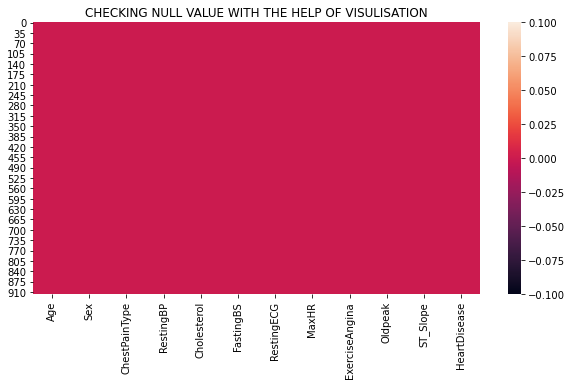

In [7]:
#IN THIS WE ARE SEEING THE NULL VALUE IN THE FORM OF DAIGRAM 

plt.figure(figsize=(10,5))
plt.title('CHECKING NULL VALUE WITH THE HELP OF VISULISATION')
sns.heatmap(df.isnull())

In [8]:
# IN THIS WE ARE TRYING TO KNNOW ABOUT THE UNIQUE VALUE OF COLUMNS

for i in df.columns:
    print(i)
    print(df[i].unique())
    print("===================================================================================================================")
    print(end="\n")

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Sex
['M' 'F']

ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404

In [9]:
# IN THIS WE ARE FINDING THE WEITAGE OF THE VALUE IN EVERY COLUMNS

for i in df.columns:
    print(i)
    print(df[i].value_counts(normalize=True))
    print("===================================================================================================================")
    print(end="\n")

Age
54    0.055556
58    0.045752
55    0.044662
57    0.041394
56    0.041394
52    0.039216
62    0.038126
59    0.038126
51    0.038126
53    0.035948
60    0.034858
48    0.033769
61    0.033769
63    0.032680
50    0.027233
43    0.026144
46    0.026144
41    0.026144
64    0.023965
49    0.022876
65    0.022876
47    0.020697
44    0.020697
45    0.019608
42    0.019608
38    0.017429
67    0.016340
39    0.016340
69    0.014161
40    0.014161
66    0.014161
35    0.011983
37    0.011983
68    0.010893
34    0.007625
74    0.007625
70    0.007625
36    0.006536
32    0.005447
71    0.005447
72    0.004357
75    0.003268
29    0.003268
76    0.002179
77    0.002179
33    0.002179
31    0.002179
73    0.001089
30    0.001089
28    0.001089
Name: Age, dtype: float64

Sex
M    0.78976
F    0.21024
Name: Sex, dtype: float64

ChestPainType
ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

RestingBP
120    0.143791
130    0.128540
140  

<AxesSubplot:title={'center':'COUNT PLOT'}, xlabel='HeartDisease', ylabel='count'>

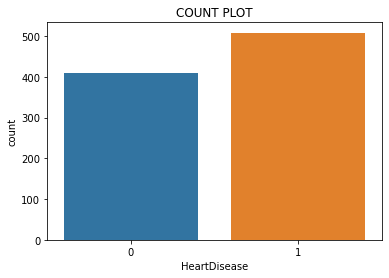

In [10]:
#IN THIS WE ARE CHECKING THE TARGET VALUE DISTRIBUTION 

plt.title('COUNT PLOT')
sns.countplot(df['HeartDisease'])

AS WE ARE SEEING IN THE DAIGRAM OUR DATA IS NOT BAISED

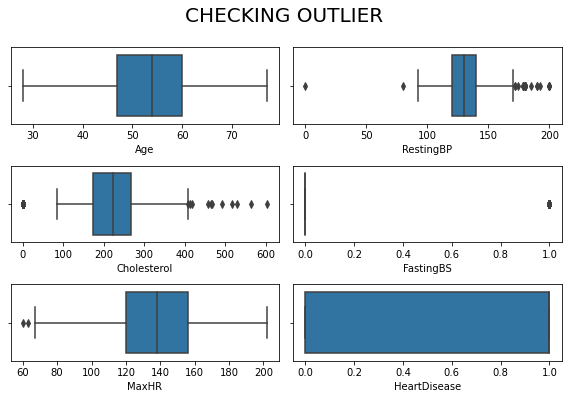

In [11]:
# IN THIS WE CHECKING THE OUTLIER OF EVERY COLUMN WITH  THE HELP OF BOXPLOT

list1=[item for item in df.columns if df[item].dtypes=='int64']
plt.figure(figsize=(8,10))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 2, i+1)
    plt.suptitle("CHECKING OUTLIER", fontsize=20, x=0.5, y=1)
    sns.boxplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN THE BOXPLOT THERE ARE ONLY TWO COLUMNS THAT HAVE OUTLIERS THAT IS RESTINGBP AND CHOLESTROL

# DATA LABELING 

In [12]:
# AS WE ARE SEEING OUR DATA HAVE CATEGORIAL DATA SO WE HAVE TO CONVERT THE DATA INTO INTEGER FORMAT

list1=[item for item in df.columns if df[item].dtypes=='object']
le=LabelEncoder()
for i in list1:
    df[i]=le.fit_transform(df[i])

In [13]:
# AFTER LABELING THE DATA WE CAN SEE OUR DATA  
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# DAIGNOSIS ANALYSIS OR DATA VISUALISATION

<AxesSubplot:>

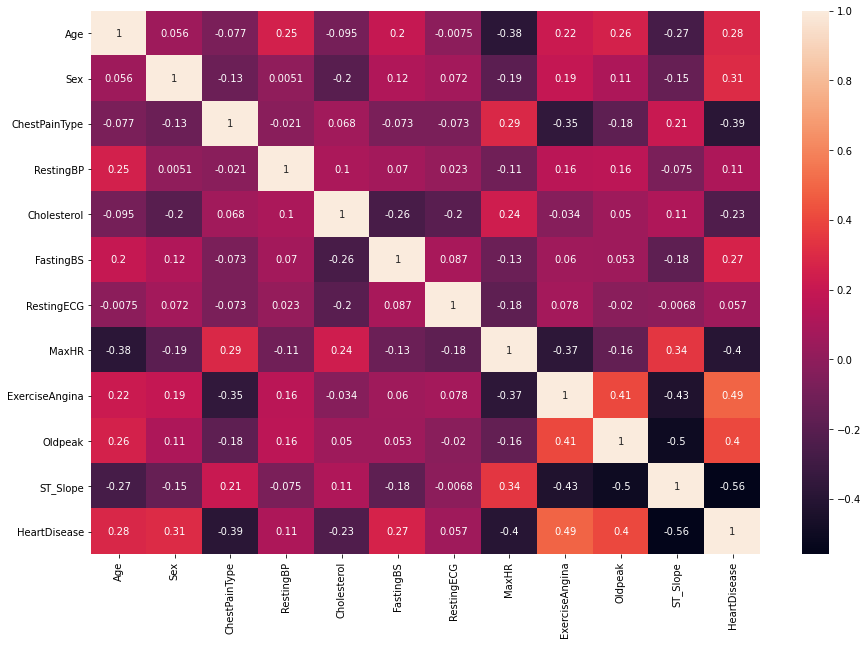

In [14]:
#IN THIS WE ARE FINDING THE CORRELATION OF COLUMN FOR FEATURE SCALING 

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

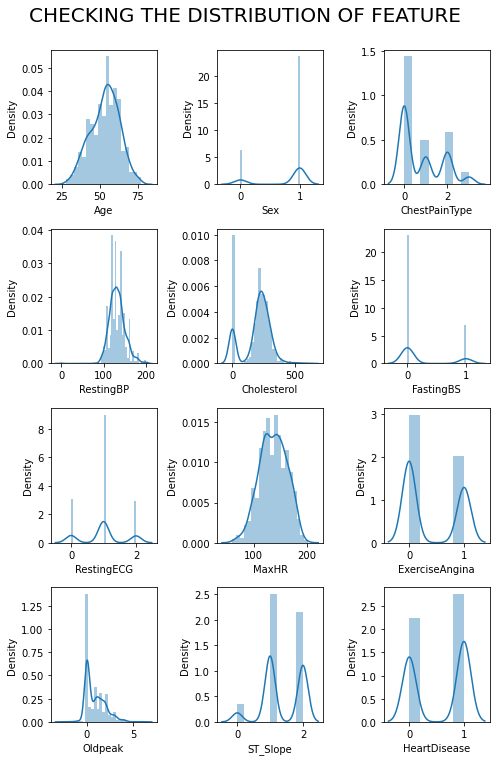

In [15]:
#IN THIS WE ARE CHECKING THAT OUR DATA IS NORMAL DISTRIBUTIVE OR NOT 

list1=list(df.columns)
plt.figure(figsize=(7,30))
for i,column in enumerate(list1):
    plt.subplot(len(list1), 3, i+1)
    plt.suptitle("CHECKING THE DISTRIBUTION OF FEATURE ", fontsize=20, x=0.5, y=1)
    sns.distplot(df[column])
    plt.tight_layout()

AS WE ARE SEEING IN ABOVE DISTPLOT THERE ARE SOME NORMAL  DISTRIBUTION AND SOME ARE SKEWED DATA 

# FEATURE SELECTION

In [16]:
#IN THIS WE ARE DOING FEATURE SELECTION FOR TAKING IMPORTANT FEATURE FROM DATASET ON THE BASIS OF VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=df.columns
vif_data['VIF']=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif_data.sort_values('VIF',ascending=False)

,feature,VIF
3,RestingBP,47.457298
0,Age,31.334848
7,MaxHR,26.170738
10,ST_Slope,10.251091
4,Cholesterol,5.322238
1,Sex,5.192227
11,HeartDisease,4.453252
6,RestingECG,3.535276
8,ExerciseAngina,2.661858
9,Oldpeak,2.576525


AS WE ARE SEEING IN OUR ABOVE TABLE RESTINGBP AND AGE HAVE HIGH VARIANCE

In [17]:
#IN THIS WE ARE DOING OLS MODEL FOR FEATURE SELECTION OM THE BASIS OF P VALUE  

import statsmodels.api as sm
import statsmodels.formula.api as smf
olsmodel = smf.ols(formula='HeartDisease~Age+Sex+ChestPainType+RestingBP+Cholesterol+FastingBS+RestingECG+MaxHR+ExerciseAngina+Oldpeak+ST_Slope',data=df).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     86.86
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.92e-133
Time:                        20:59:16   Log-Likelihood:                -330.50
No. Observations:                 918   AIC:                             685.0
Df Residuals:                     906   BIC:                             742.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8093      0.148      5.468      0.000       0.519       1.100
Age                0.0024      0.001      1.671      0.095      -0.000       0.005
Sex                0.1703      0.030      5.746      0.000       0.112       0.228
ChestPainType     -0.0943      0.013     -7.154      0.000      -0.120      -0.068
RestingBP          0.0005      0.001      0.740      0.459      -0.001       0.002
Cholesterol       -0.0005      0.000     -4.351      0.000      -0.001      -0.000
FastingBS          0.1432      0.029      4.927      0.000       0.086       0.200
RestingECG        -0.0209      0.019     -1.103      0.270      -0.058       0.016
MaxHR             -0.0016      0.001     -2.788      0.005      -0.003      -0.000
ExerciseAngina     0.1857      0.029      6.391      0.000       0.129       0.243
Oldpeak            0.0496      0.013      3.743      0.000       0.024       0.076
ST_Slope          -0.2398      0.024    -10.001      0.000      -0.287      -0.193
==============================================================================
Omnibus:                        4.499   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.794
Skew:                          -0.098   Prob(JB):                       0.0910
Kurtosis:                       3.295   Cond. No.                     3.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

IN THIS ABOUVE TABLE WE CAN EASILY FIND THE IMPORTANT FEATURE WITH THE HELP OF P COLUMN

# PREPARING DATA FOR TRAINING THE MODEL

In [18]:
#IN THIS WE ARE SEPERATING THE DATA FRAME BY DROPPING THE TARGET FEATURE 

X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']
print(X.shape)
print(Y.shape)

(918, 11)
(918,)


# STANDARDIZATION

In [19]:
# IH THIS SHELL WE ARE DOING FEATURE SCALING AND CONVERTING THE RANGE OF [-1,1] WITH THE HELP OF StandardScaler()

SS=StandardScaler()
SS.fit_transform(X,Y)

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

# DIVIDING THE DATA INTO TRAIN AND TEST

In [20]:
#IN THIS WE ARE PREPARING THE DATA INTO TWO FORM TRAIN AND TEST. TRAIN IS FOR TRAINING THE DATA TEST IS FOR TESTING THE DATA 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=31)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(642, 11)
(276, 11)
(276,)
(642,)


In [21]:
# IN THIS WE ARE USING RANDOM FOREST CLASSIFIER 

Logreg = RandomForestClassifier()
Logreg.fit(X_train,Y_train)
Y_pred = Logreg.predict(X_test)
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
TP = cm[0,0]
TN = cm[0,1]
FP = cm[1,0]
FN = cm[1,1]
print('TP:',TP ,'\nTN:',TN,'\nFP:',FP,'\nFN:', FN)
print('Presicion Score is: ',precision_score(Y_test,Y_pred))
print('Recall score is:',recall_score(Y_test,Y_pred))
print('Accuaracy Score is:',accuracy_score(Y_test,Y_pred))

TP: 108 
TN: 21 
FP: 21 
FN: 126
Presicion Score is:  0.8571428571428571
Recall score is: 0.8571428571428571
Accuaracy Score is: 0.8478260869565217


# SAVING THE MODEL

In [22]:
import pickle
pickle.dump(Logreg, open('Heart_failure.pickle', 'wb'))
Heart_failure_model = pickle.load(open('Heart_failure.pickle', 'rb'))

# CONCLUSION

IN THIS WE ARE PERFORMING MANY OPERATION AND AFTER DOING DATA PREPROCESSING WE ARE MAKING 3 ML MODEL AND AFTER COMPARING THEIR ACCURACY OF 3 MODEL WE CAN GET RANDOMFORESTCLASSIFIER HAVE HIGH ACCURACY